# IMPORTING LIBRARIES

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import urllib as ul
%matplotlib inline

In [42]:
df=pd.read_csv("Thinspeak_data.csv")
df.drop(['Unnamed: 2'], axis=1, inplace=True)
df.head(5)

,DATETIME,ENERGY
0,2022-04-18T22:09:52+05:30,5126.00
1,2022-04-19T11:24:37+05:30,351.11
2,2022-04-19T11:25:22+05:30,346.79
3,2022-04-19T11:25:38+05:30,345.03
4,2022-04-19T11:25:58+05:30,348.51


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATETIME  138 non-null    object 
 1   ENERGY    138 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [44]:
df.describe()

,ENERGY
count,138.000000
mean,219.090435
std,483.064973
min,0.000000
25%,37.475000
50%,146.435000
75%,346.252500
max,5126.000000


# REFORMAT DATE TIME COLUMNS

In [54]:
dataset = df
dataset["Date"] = pd.to_datetime(df["DATETIME"]).dt.date
dataset["Time"] = pd.to_datetime(df["DATETIME"]).dt.time

dataset = df.set_index("DATETIME")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(5)

,ENERGY,Year,Date,Time
DATETIME,,,,
2022-04-18 22:09:52+05:30,5126.00,2022,2022-04-18,22:09:52
2022-04-19 11:24:37+05:30,351.11,2022,2022-04-19,11:24:37
2022-04-19 11:25:22+05:30,346.79,2022,2022-04-19,11:25:22
2022-04-19 11:25:38+05:30,345.03,2022,2022-04-19,11:25:38
2022-04-19 11:25:58+05:30,348.51,2022,2022-04-19,11:25:58


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ennergy Distribution')

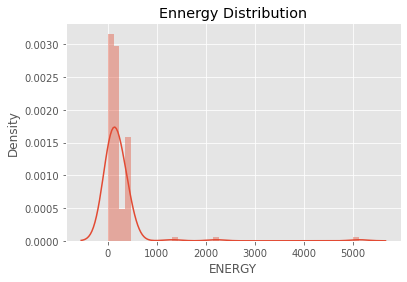

In [50]:
sns.distplot(dataset["ENERGY"])
plt.title("Ennergy Distribution")

<AxesSubplot:>

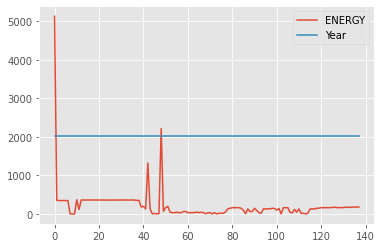

In [52]:
df.plot()

# TRAINING AND TESTING DATA SPLIT

In [102]:
train=df['ENERGY'].iloc[:120]
test=df['ENERGY'].iloc[120:]
train=np.array(train)
test=np.array(test)

In [110]:
print(train)
train=np.reshape(train,(120,1))

[5.12600e+03 3.51110e+02 3.46790e+02 3.45030e+02 3.48510e+02 3.45010e+02
 3.46660e+02 0.00000e+00 0.00000e+00 0.00000e+00 3.69080e+02 1.14300e+02
 3.60840e+02 3.61660e+02 3.62230e+02 3.61040e+02 3.61010e+02 3.59780e+02
 3.58170e+02 3.59540e+02 3.58770e+02 3.58680e+02 3.60030e+02 3.57700e+02
 3.58220e+02 3.60230e+02 3.59290e+02 3.57890e+02 3.58520e+02 3.60980e+02
 3.59890e+02 3.61990e+02 3.59830e+02 3.59460e+02 3.60770e+02 3.61080e+02
 3.59070e+02 3.50830e+02 3.52120e+02 1.79970e+02 1.95450e+02 1.29340e+02
 1.32193e+03 1.35490e+02 0.00000e+00 1.25000e+01 1.62000e+00 9.05000e+00
 2.21627e+03 6.74900e+01 1.62840e+02 1.95500e+02 4.55200e+01 3.16000e+01
 3.26000e+01 4.45100e+01 3.25200e+01 3.24600e+01 6.11200e+01 6.27600e+01
 3.25200e+01 3.22200e+01 3.25800e+01 3.32000e+01 4.68600e+01 3.30800e+01
 4.21400e+01 3.60300e+01 3.44000e+00 3.04300e+01 3.02500e+01 1.15000e+00
 3.26000e+01 1.15000e+00 1.70000e+01 1.55900e+01 1.67700e+01 5.36800e+01
 1.32630e+02 1.46470e+02 1.61290e+02 1.62400e+02 1.

In [114]:

test=np.reshape(test,(len(test),1))
print(test)

[[162.23]
 [161.92]
 [162.48]
 [162.69]
 [162.77]
 [166.36]
 [174.98]
 [163.  ]
 [162.8 ]
 [162.94]
 [167.18]
 [171.5 ]
 [175.  ]
 [171.08]
 [176.42]
 [176.73]
 [178.67]
 [178.67]]


In [121]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
train_scaled=sc.fit_transform(train)
test_scaled=sc.fit_transform(test)

In [123]:
print(train_scaled)

[[1.00000000e+00]
 [6.84959032e-02]
 [6.76531409e-02]
 [6.73097932e-02]
 [6.79886851e-02]
 [6.73058915e-02]
 [6.76277799e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [7.20015607e-02]
 [2.22980882e-02]
 [7.03940694e-02]
 [7.05540382e-02]
 [7.06652361e-02]
 [7.04330862e-02]
 [7.04272337e-02]
 [7.01872805e-02]
 [6.98731955e-02]
 [7.01404604e-02]
 [6.99902458e-02]
 [6.99726883e-02]
 [7.02360515e-02]
 [6.97815060e-02]
 [6.98829497e-02]
 [7.02750683e-02]
 [7.00916894e-02]
 [6.98185720e-02]
 [6.99414748e-02]
 [7.04213812e-02]
 [7.02087398e-02]
 [7.06184159e-02]
 [7.01970347e-02]
 [7.01248537e-02]
 [7.03804136e-02]
 [7.04408896e-02]
 [7.00487710e-02]
 [6.84412798e-02]
 [6.86929380e-02]
 [3.51092470e-02]
 [3.81291455e-02]
 [2.52321498e-02]
 [2.57887242e-01]
 [2.64319157e-02]
 [0.00000000e+00]
 [2.43854858e-03]
 [3.16035895e-04]
 [1.76550917e-03]
 [4.32358564e-01]
 [1.31662115e-02]
 [3.17674600e-02]
 [3.81388997e-02]
 [8.88021849e-03]
 [6.16465080e-03]
 [6.35973469e-03]
 [8.683183

In [124]:
print(test_scaled)

[[0.01850746]
 [0.        ]
 [0.03343284]
 [0.04597015]
 [0.05074627]
 [0.26507463]
 [0.77970149]
 [0.06447761]
 [0.05253731]
 [0.06089552]
 [0.31402985]
 [0.5719403 ]
 [0.78089552]
 [0.54686567]
 [0.86567164]
 [0.8841791 ]
 [1.        ]
 [1.        ]]


In [125]:
print("train shape: {}".format(train.shape))
print("test shape: {}".format(test.shape))

train shape: (120, 1)
test shape: (18, 1)


# TRAINING LSTM MODEL

In [129]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [134]:
n_input = 1
n_features=1
generator = TimeseriesGenerator(train_scaled, train_scaled, length=n_input, batch_size=1)

In [132]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [136]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [138]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [140]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 2/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 3/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 4/50
119/119 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 5/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 6/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 7/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 8/50
119/119 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 9/50
119/119 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 10/50
119/119 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 11/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 12/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 13/50
119/119 [====

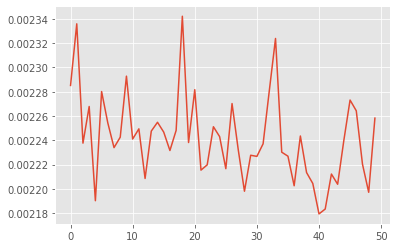

In [142]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [143]:
test_batch=np.reshape(test_scaled[0],(1,n_input,n_features))

# MAKING PREDICTIONS

In [145]:
model.predict(test_batch)

array([[0.03763375]], dtype=float32)

In [147]:
test_scaled[0]

array([0.01850746])

In [149]:
test_predictions = []

first_eval_batch = train_scaled[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [151]:
print(test_predictions)

[array([0.04401977], dtype=float32), array([0.0530602], dtype=float32), array([0.0585439], dtype=float32), array([0.0618746], dtype=float32), array([0.06389922], dtype=float32), array([0.06513051], dtype=float32), array([0.06587955], dtype=float32), array([0.06633532], dtype=float32), array([0.06661266], dtype=float32), array([0.06678144], dtype=float32), array([0.06688415], dtype=float32), array([0.06694667], dtype=float32), array([0.06698471], dtype=float32), array([0.06700787], dtype=float32), array([0.06702197], dtype=float32), array([0.06703053], dtype=float32), array([0.06703575], dtype=float32), array([0.06703893], dtype=float32)]


In [153]:
true_predictions = sc.inverse_transform(test_predictions)

In [154]:
test=df.iloc[120:]
test['Predictions'] = true_predictions

C:\Users\User\AppData\Local\Temp\ipykernel_8424\3095854463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [158]:
test.head(8)

,DATETIME,ENERGY,Year,Date,Time,Predictions
120,2022-04-28T17:58:00+05:30,162.23,2022,2022-04-28,17:58:00,162.657331
121,2022-04-28T17:58:15+05:30,161.92,2022,2022-04-28,17:58:15,162.808758
122,2022-04-28T17:58:41+05:30,162.48,2022,2022-04-28,17:58:41,162.900610
123,2022-04-28T17:58:56+05:30,162.69,2022,2022-04-28,17:58:56,162.956400
124,2022-04-28T17:59:12+05:30,162.77,2022,2022-04-28,17:59:12,162.990312
125,2022-04-28T17:59:29+05:30,166.36,2022,2022-04-28,17:59:29,163.010936
126,2022-04-28T17:59:44+05:30,174.98,2022,2022-04-28,17:59:44,163.023483
127,2022-04-28T18:00:01+05:30,163.00,2022,2022-04-28,18:00:01,163.031117


# SENDING THE PREDICTED VALUES TO THINGSPEAK

In [ ]:

def sendDataToServer(c):
    a=ul.request.urlopen("https://api.thingspeak.com/update?api_key=Y979M1TXKR2ZBOU4&field5"+str(c))

import time
import random
next_time = time.time()
while True:
    # Read data
    b=ul.request.urlopen("https://api.thingspeak.com/channels/1706461/fields/5.json?results=1")
    a=np.reshape(test_scaled[0],(1,n_input,n_features))
    c=sc.inverse_transform(model.predict(a))
    time.sleep(0.1)
    # Send data
    
    sendDataToServer(c)

    